# **Survival Analysis**


Survival analysis is a popular statistical method to investigate the expected duration of time until an event of interest occurs.

We will investigate IBM Employee Attrition & Performance dataset using lifelines package.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import lifelines # for survival analysis
from sklearn.preprocessing import LabelEncoder

In [121]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')

In [122]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [123]:
# Look at the categorical and numerical variables 

summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: 

In [124]:
# Convert the Attrition into binary variable

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])

# **Kaplan-Meier Estimator**



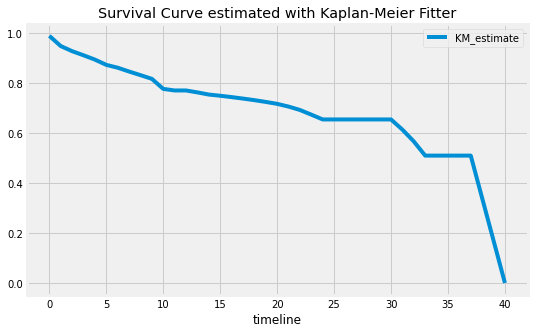

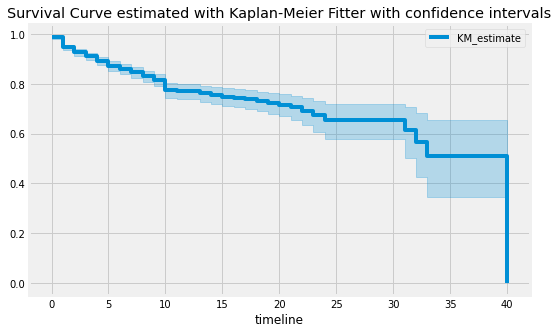

In [125]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

In [126]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


## **Survival Function of Different Groups**

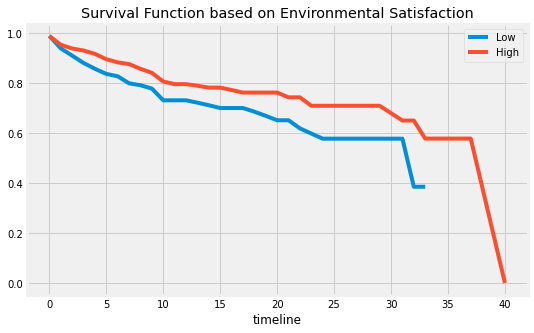

In [127]:
EnvironmentalLow = ((df['EnvironmentSatisfaction'] == 1) | (df['EnvironmentSatisfaction'] == 2))
EnvironmentalHigh = ((df['EnvironmentSatisfaction'] == 3) | (df['EnvironmentSatisfaction'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLow]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[EnvironmentalHigh]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Environmental Satisfaction')
plt.show();

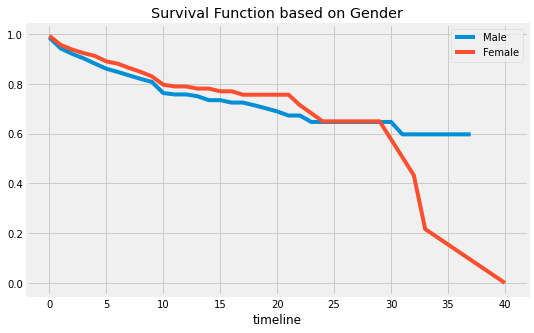

In [128]:
male = (df['Gender'] == 'Male')
female = (df['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

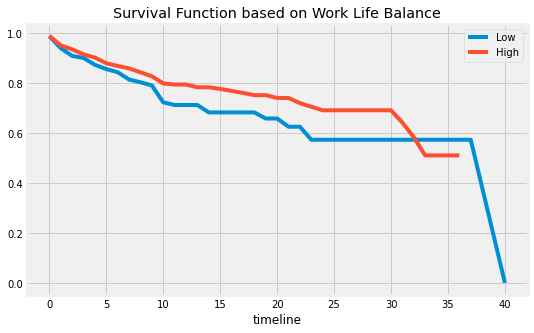

In [129]:
worklifelow = ((df['WorkLifeBalance'] == 1) | (df['WorkLifeBalance'] == 2))
worklifehigh = ((df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[worklifelow]['YearsAtCompany'], 
        event_observed=df[worklifelow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[worklifehigh]['YearsAtCompany'], 
        event_observed=df[worklifehigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Work Life Balance')
plt.show();

In [130]:
from lifelines.statistics import logrank_test

output = logrank_test(durations_A = df[worklifelow]['YearsAtCompany'],
                      durations_B = df[worklifehigh]['YearsAtCompany'],
                      event_observed_A = df[worklifelow]['Attrition'],
                      event_observed_B = df[worklifehigh]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

In [131]:
output = logrank_test(durations_A = df[male]['YearsAtCompany'],
                      durations_B = df[female]['YearsAtCompany'],
                      event_observed_A = df[male]['Attrition'],
                      event_observed_B = df[female]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47>

## **Cox Proportional-Hazards Model**

In [132]:
# Prepare the dataframe for fitting
columns_selected = ['Attrition',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'JobLevel',
                    'JobSatisfaction',
                    'PercentSalaryHike',
                    'RelationshipSatisfaction',
                    'StockOptionLevel', 
                    'TrainingTimesLastYear', 
                    'YearsAtCompany',
                    ]
df = df[columns_selected]

In [133]:
from lifelines import CoxPHFitter 

coxph = CoxPHFitter()
coxph.fit(df, 
          duration_col='YearsAtCompany',
          event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [134]:
# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new, 
                              conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]



,1,3,4,5,6
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.986432,0.954724,0.960284,0.962205,0.988253
2.0,0.986432,0.832634,0.916395,0.921246,0.978083
3.0,0.967805,0.809509,0.861182,0.810190,0.966473
4.0,0.945323,0.809509,0.827521,0.789046,0.951264
5.0,0.932830,0.778307,0.780170,0.789046,0.941632
6.0,0.915765,0.741488,0.733268,0.760459,0.927576
7.0,0.896696,0.721426,0.683693,0.726635,0.913012
8.0,0.873145,0.694477,0.556010,0.708161,0.896843
9.0,0.842241,0.664991,0.532846,0.683297,0.850747


In [135]:
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1449.16
         time fit was run = 2021-07-03 19:13:33 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
EnvironmentSatisfaction   -0.24       0.79       0.06            -0.35            -0.12                 0.70                 0.89
JobInvolvement            -0.44       0.65       0.09            -0.61            -0.27                 0.55                 0.76
JobLevel                  -1.02       0.36       0.09            -1.20            -0.83                 0.30                 0.44
JobSatisfaction           -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.08       0.92       0.06            -0.20             0.04                 0.82                 1.04
StockOptionLevel          -0.42       0.65       0.09            -0.60            -0.24                 0.55                 0.78
TrainingTimesLastYear     -0.17       0.85       0.05            -0.28            -0.06                 0.76                 0.94

                              z      p   -log2(p)
covariate                                        
EnvironmentSatisfaction   -4.00 <0.005      13.92
JobInvolvement            -5.08 <0.005      21.31
JobLevel                 -10.77 <0.005      87.49
JobSatisfaction           -3.77 <0.005      12.61
PercentSalaryHike         -0.44   0.66       0.60
RelationshipSatisfaction  -1.34   0.18       2.46
StockOptionLevel          -4.63 <0.005      18.04
TrainingTimesLastYear     -3.07 <0.005       8.84
---
Concordance = 0.79
Partial AIC = 2914.33
log-likelihood ratio test = 249.92 on 8 df
-log2(p) of ll-ratio test = 161.93

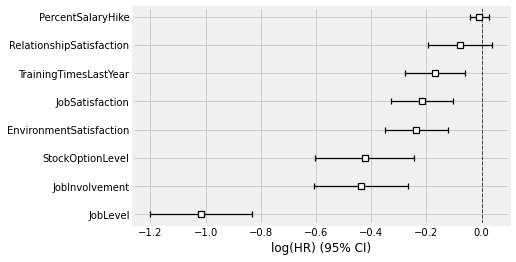

In [136]:
coxph.plot()

In [137]:
coxph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]